# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Nurul Izzah
- **Email:** prdsdez@gmail.com
- **ID Dicoding:** aichlyce

## Menentukan Pertanyaan Bisnis

- Apa produk yang paling banyak terjual? Apakah ada produk tertentu yang lebih populer di musim atau periode tertentu?
- Berapa pendapatan e-commerce setiap bulan? Apa produk yang menyumbang pendapatan yang lebih tinggi dibandingkan yang lain tiap bulannya?
- Daerah manakah yang melakukan pembelian paling banyak?

## Import Semua Packages/Library yang Digunakan

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
from scipy import stats

## Data Wrangling

### Gathering Data

Pada tahap ini, saya mengumpulkan data dari sumber yang tersedia. Setelah data terkumpul, saya memeriksa struktur kolom dari setiap dataset yang akan diolah. Langkah ini penting untuk memastikan bahwa semua data yang relevan tersedia untuk dianalisis lebih lanjut.

In [61]:
data_dir = "c:/Users/icha/Documents/dicoding-submission/data/"

# opening datasets individually (ignored customers and sellers)
orders = pd.read_csv(data_dir + 'olist_orders_dataset.csv')
items = pd.read_csv(data_dir + 'olist_order_items_dataset.csv')
products = pd.read_csv(data_dir + 'olist_products_dataset.csv')
payments = pd.read_csv(data_dir + 'olist_order_payments_dataset.csv')
reviews = pd.read_csv(data_dir + 'olist_order_reviews_dataset.csv')
customers = pd.read_csv(data_dir + 'olist_customers_dataset.csv')
sellers = pd.read_csv(data_dir + 'olist_sellers_dataset.csv')
geolocation = pd.read_csv(data_dir + 'olist_geolocation_dataset.csv')
category = pd.read_csv(data_dir + 'product_category_name_translation.csv')

data = {'orders': orders,
        'items': items,
        'products': products,
        'payments': payments,
        'reviews': reviews,
        'customers': customers,
        'sellers': sellers,
        'geo': geolocation,
        'category': category}

In [62]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [63]:
data['geo'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [64]:
data['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [65]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [66]:
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [67]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [68]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [69]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [70]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Setelah itu, kita menjadi tau struktur kolom dari setiap dataset yang akan kita olah

### Assessing Data

Pada tahap ini, saya mengakses data yang sudah dikumpulkan. Setelah data diakses, saya melakukan eksplorasi awal untuk memahami struktur, isi, serta kondisi data. Langkah ini penting untuk mengidentifikasi potensi masalah seperti nilai yang hilang, duplikasi, atau anomali dalam data sebelum melanjutkan ke proses pembersihan dan analisis lebih lanjut.

Menilai info data

In [71]:
for df_name, df in data.items():
  print(data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  ob

Mengganti Tipe Data order_estimated_delivery_date menjadi datetime

In [72]:
# Convert date columns in the orders dataset to datetime format
date_columns_orders = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for column in date_columns_orders:
    data['orders'][column] = pd.to_datetime(data['orders'][column])

# Convert date column in the items dataset to datetime format
date_columns_items = ["shipping_limit_date"]

for column in date_columns_items:
    data['items'][column] = pd.to_datetime(data['items'][column])

# Convert date columns in the reviews dataset to datetime format
date_columns_reviews = ["review_creation_date", "review_answer_timestamp"]

for column in date_columns_reviews:
    data['reviews'][column] = pd.to_datetime(data['reviews'][column])


Menilai Duplikat Data

In [73]:
def calculate_duplicates_and_total_samples(data):
    results = []
    for df_name, df in data.items():
        duplicate_count = df.duplicated().sum()
        total_sample_count = len(df)
        results.append((df_name, total_sample_count, duplicate_count))

    return pd.DataFrame(results, columns=['DataFrame Name', 'Total Sample Count', 'Duplicate Count'])

result_df = calculate_duplicates_and_total_samples(data)
print(result_df)

  DataFrame Name  Total Sample Count  Duplicate Count
0         orders               99441                0
1          items              112650                0
2       products               32951                0
3       payments              103886                0
4        reviews               99224                0
5      customers               99441                0
6        sellers                3095                0
7            geo             1000163           261831
8       category                  71                0


In [74]:
def check_null_values(dataframes):
    null_results = []
    for name, df in dataframes.items():
        null_check = df.isna().sum().sum()  # Menghitung total nilai null
        null_results.append((name, null_check))

    return pd.DataFrame(null_results, columns=['DataFrame Name', 'Total Null Values'])

result_df = check_null_values(data)
print(result_df)

  DataFrame Name  Total Null Values
0         orders               4908
1          items                  0
2       products               2448
3       payments                  0
4        reviews             145903
5      customers                  0
6        sellers                  0
7            geo                  0
8       category                  0


**Insight:**
- Pada dataset Order terdapat missing value (type) pada kolom order_estimated_delivery_date 
- Pada dataset Products dan Reviews juga terdapat missing value
- Pada dataset Geolocation terdapat duplikat data

### Cleaning Data

Pada tahap ini, saya membersihkan data dari nilai-nilai yang hilang, terdapat duplikat, atau anomali. Langkah ini penting untuk memastikan kualitas data agar memudahkan kita saat proses analisis lebih lanjut

1. Data Order

Check jumlah order

In [75]:
print(data['orders']['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


Menghapus pesanan yang tidak dikirim & check missing value lagi

In [76]:
# Pertama, ambil semua order_id di mana status pesanan bukan 'delivered'
non_delivered_orders = data['orders']['order_id'][data['orders']['order_status'] != 'delivered'].values

# Filter setiap dataframe lain di mana 'order_id' adalah foreign key, hapus data dengan order_id yang bukan 'delivered'
for key, df in data.items():
    if 'order_id' in df.columns:
        df.drop(df.loc[df['order_id'].isin(non_delivered_orders)].index, inplace=True)

# Memeriksa kolom yang mengandung nilai NaN di setiap dataset dan mencetak persentase nilai NaN
for key, df in data.items():
    for col in df.columns:
        # Cetak nama kolom jika terdapat nilai NaN dan hitung persentase NaN
        if df[col].isnull().sum():
            print(f"{col} (%): {(df[col].isnull().sum() / len(df)) * 100}")


order_approved_at (%): 0.014511080246273761
order_delivered_carrier_date (%): 0.0020730114637533947
order_delivered_customer_date (%): 0.008292045855013579
product_category_name (%): 1.8512336499650999
product_name_lenght (%): 1.8512336499650999
product_description_lenght (%): 1.8512336499650999
product_photos_qty (%): 1.8512336499650999
product_weight_g (%): 0.006069618524475737
product_length_cm (%): 0.006069618524475737
product_height_cm (%): 0.006069618524475737
product_width_cm (%): 0.006069618524475737
review_comment_title (%): 88.36873839001255
review_comment_message (%): 59.4244559520968


In [77]:
print('Jumlah missing value(pada tanggal pengiriman): ' + str(data['orders'].order_delivered_customer_date.isnull().sum()))

Jumlah missing value(pada tanggal pengiriman): 8


In [78]:
# Kita bisa menghapus entri yang sama seperti sebelumnya
# Pertama, ambil semua order_id yang tidak memiliki tanggal pengiriman
orders_missing_delivery = data['orders']['order_id'][data['orders']['order_delivered_customer_date'].isnull()].values

# Filter setiap dataframe di mana 'order_id' adalah foreign key, dan hapus entri yang tidak memiliki tanggal pengiriman
for key, df in data.items():
    if 'order_id' in df.columns:
        df.drop(df.loc[df['order_id'].isin(orders_missing_delivery)].index, inplace=True)

data['orders']['delivered_on_time'] = np.where(data['orders']['order_delivered_customer_date'] < data['orders']['order_estimated_delivery_date'], 'On Time', 'Late')

2. Products

Menghapus kolom yang tidak dibutuhkan (tidak memiliki info penting)

In [79]:
def remove_unnecessary_product_columns(products_df):
    drop_columns = [
        "product_name_lenght",
        "product_description_lenght",
        "product_weight_g",
        "product_length_cm",
        "product_height_cm",
        "product_width_cm"
    ]

    products_df.drop(drop_columns, axis=1, inplace=True)
    return products_df

Mengganti nilai NaN (missing value)

In [80]:
def fill_missing_values(products_df):

    fill_values = {
        "product_category_name": "other",
        "product_photos_qty": 0
    }

    products_df.fillna(fill_values, inplace=True)
    return products_df

3. Reviews

Menghapus kolom yang tidak dibutuhkan

In [81]:
def remove_unnecessary_review_columns(reviews_df):
    drop_columns = ["review_comment_title"]

    reviews_df.drop(drop_columns, axis=1, inplace=True)
    return reviews_df

# Example usage:
data['reviews'] = remove_unnecessary_review_columns(data['reviews'])

Mengganti nilai NaN

In [82]:
def handle_review_comments(reviews_df):
    reviews_df['review_comment_message'] = reviews_df['review_comment_message'].fillna(0).astype(int)
    return reviews_df

4. Geolocation

Menghapus duplikat data

In [83]:
#Remove duplicate data
data['geo'].drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

1. Explore Orders & Customers

Orders

In [84]:
data['orders'].sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
48185,26258cbf6d2a9914460dcb10876cfd01,2a71f0f553e5ed3a56fdbaf9e41f4f5c,delivered,2017-02-12 19:15:33,2017-02-12 19:30:16,2017-02-14 09:44:50,2017-02-21 14:42:52,2017-03-14,On Time
98809,a7dfcc78536e420e85e510d7bb161cb4,9d07ed48127e776f64b02de9aa00c136,delivered,2017-12-22 01:09:21,2017-12-22 01:18:31,2017-12-22 16:23:25,2018-01-09 17:51:48,2018-01-19,On Time
46651,84a5898c018be5c7ee3e45969708ebbe,a280ef36b320f176238aca454824fd91,delivered,2018-06-14 13:39:00,2018-06-15 02:17:29,2018-06-15 17:25:00,2018-06-21 17:18:58,2018-07-16,On Time
8317,8e07c114644753d4ec048f065197db8e,75ca43872d52b1b5edefa39295d893ee,delivered,2018-01-15 17:40:06,2018-01-15 17:50:57,2018-01-17 20:22:07,2018-01-23 23:22:59,2018-02-08,On Time
46294,02e405aa2667a116637cdb4affaf93c0,e9265d4ec55c848f9330c9449ba3b2f7,delivered,2018-04-17 23:29:11,2018-04-17 23:51:37,2018-04-19 11:53:51,2018-04-30 23:18:49,2018-05-18,On Time


Akses informasi tentang Orders

In [85]:
data['orders']['delivered_on_time'].describe()

count       96470
unique          2
top       On Time
freq        88644
Name: delivered_on_time, dtype: object

Customers

In [86]:
data['customers'].sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
20310,074cc70e32d05dcf3c23aead0dba2320,f0987e3c8d691d1baacb6343a7d6a670,23052,rio de janeiro,RJ
27769,d65d94358b0f8e89ecdc82e534e28c44,1b656b2f23af5e1ab13d8f067cd49527,2410,sao paulo,SP
53280,1bed328bed3e5501868523f4d8a3b646,1efb4a0f5e6617e5441eb67e2a176067,8773,mogi das cruzes,SP
10416,aa0e4697be6ef9ac1fe98b04ba32acca,cf7fc0d217ee5b7273e604a6c34fe163,13080,campinas,SP
18069,ce26233b2ebaf4d7a4003215f3f81a93,ad5d2fcaf9ffe6863ae85bce03138831,23092,rio de janeiro,RJ


Akses informasi customers berdasarkan kota

In [87]:
data['customers'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

Akses informasi customers berdasarkan negara

In [88]:
data['customers'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Akses informasi customers berdasarkan pembelian paling banyak

In [89]:
# Menggabungkan data orders dan customers
merged_data = data['orders'].merge(data['customers'], on='customer_id')

# Menghitung jumlah pembelian per pelanggan
top_customers = merged_data.groupby('customer_id').size().reset_index(name='purchase_count')

# Mengurutkan pelanggan berdasarkan jumlah pembelian dan mengambil 5 teratas
top_5_customers = top_customers.sort_values(by='purchase_count', ascending=False).head(5)

# Menampilkan hasil
print(top_5_customers)

                            customer_id  purchase_count
96469  ffffa3172527f765de70084a7e53aae8               1
0      00012a2ce6f8dcda20d059ce98491703               1
1      000161a058600d5901f007fab4c27140               1
2      0001fd6190edaaf884bcaf3d49edf079               1
3      0002414f95344307404f0ace7a26f1d5               1


Merge orders dan customers

In [90]:
customers_orders_df = pd.merge(
    left=data['customers'],
    right=data['orders'],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,On Time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,On Time
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,On Time
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,On Time


2. Explore Items & Sellers

Explore Items

In [91]:
data['items'].sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
83873,be7f750bcb350e7e289e828efc763466,2,7d7cb1699744aa881c5a06f79cf072ff,c35672b10ad50968f567ea3f4b91e877,2018-01-23 03:38:46,15.99,9.31
22329,3304c0c857a9c77a201a551f5a3cacb8,4,7bbc646134de228a74392d8407d16df8,ddd51ae8cda92f3995a51fc0f0f3eec7,2017-05-10 13:10:46,34.90,9.34
80919,b7fc96d05af08ecd1ecc914608254771,1,acce642ddd64b83faaf4c3e30200cf63,744dac408745240a2c2528fb1b6028f3,2017-11-09 20:26:45,139.00,16.41
38832,583d5978ccf34486c5dbf738558e1b7a,1,7564c1759c04fc0a38f2aa84f7a370ee,6860153b69cc696d5dcfe1cdaaafcf62,2018-07-17 16:55:21,42.97,13.88
382,00efb72d8e18533f736e86770705d094,1,3fbc0ef745950c7932d5f2a446189725,06a2c3af7b3aee5d69171b0e14f0ee87,2018-06-12 17:53:08,66.99,22.97


Explore Sellers

In [92]:
data['sellers'].sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
77,7722b1df1b0e383e000397b2c11e3e19,9715,sao bernardo do campo,SP
436,6ddc28b61be28373b4503a1f61cf98a9,3543,sao paulo,SP
2154,ab27bbbad5239bc31a34709275a70db4,18279,tatui,SP
1147,688756f717c462a206ad854c5027a64a,7094,guarulhos,SP
907,b5bb2b985208834bd5bd86c7a402bbad,95800,venancio aires,RS


Merge Items dan Sellers

In [93]:
items_sellers_df = pd.merge(
    left=data['items'],
    right=data['sellers'],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

items_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


Akses informasi sellers berdasarkan kota

In [94]:
items_sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         661
curitiba          124
rio de janeiro     92
belo horizonte     65
ribeirao preto     50
ibitinga           49
guarulhos          48
santo andre        44
campinas           40
maringa            40
Name: seller_id, dtype: int64

3. Explore Payments

In [95]:
data['payments'].sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
101628,a76c04c041ff4afb92ba60bc6385d8e6,1,credit_card,4,119.93
10699,c465b4dc1929898adffb867fb70fbadd,1,boleto,1,130.36
13546,9c54a1816e487456bb7eb5082b9823ff,5,voucher,1,9.37
92846,a56dd0288c36351da4eed1f4c1c2ec09,1,credit_card,1,26.25
14195,17f11cd471c4f712a82d85c589119638,1,credit_card,2,161.69


Akses informasi payments berdasarkan type

In [96]:
data['payments'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    74297
boleto         19191
voucher         3679
debit_card      1484
Name: order_id, dtype: int64

4. Explore Products dan Category

Explore Products

In [97]:
data['products'].sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
28413,71fa3ded050dac9c89b71383bbe4df76,fashion_calcados,40.0,303.0,12.0,400.0,29.0,7.0,16.0
14230,779de9dd06ff30d5097a959a1e9dacdc,automotivo,59.0,1031.0,2.0,2250.0,61.0,22.0,22.0
28273,e936308f97d9eea5a750bea27dcfc6ec,moveis_decoracao,25.0,410.0,3.0,300.0,50.0,25.0,16.0
11910,ed559580d7be0449d8211dc4addc4108,esporte_lazer,43.0,2161.0,3.0,2700.0,30.0,25.0,25.0
17579,95c2f466171b1c183f5e769563bdc7cd,telefonia,60.0,776.0,3.0,250.0,19.0,3.0,11.0


Explore Category

In [98]:
data['category'].sample(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
18,eletroportateis,small_appliances
15,telefonia_fixa,fixed_telephony
12,papelaria,stationery
20,audio,audio


Merge Products dan Category

In [99]:
products_df = pd.merge(
    left=data['products'],
    right=data['category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


Akses informasi berdasarkan jumlah produk dengan kategori unik terbanyak

In [100]:
products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

5. Explore Geolocation

In [101]:
data['geo'].sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
607758,36088,-21.714807,-43.441832,juiz de fora,MG
8897,1320,-23.557888,-46.639554,são paulo,SP
213092,8670,-23.540764,-46.330809,suzano,SP
424364,21230,-22.828418,-43.324466,rio de janeiro,RJ
396416,18800,-23.200400,-49.372998,piraju,SP


Akses informasi Geo dengan Zip Code terbanyak

In [102]:
data['geo'].groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
58403      1
1200       1
1189       1
1290       1
1262       1
Length: 19015, dtype: int64

Akses informasi Geo berdasarkan zip code tertentu

In [103]:
data['geo'][data['geo']['geolocation_zip_code_prefix'] == 25935].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
490280,25935,-22.610757,-43.159741,mage,RJ
490290,25935,-22.586991,-43.185484,mage,RJ
490294,25935,-22.596623,-43.176926,mage,RJ
490298,25935,-22.617176,-43.189157,mage,RJ
490318,25935,-22.610951,-43.184255,mage,RJ


Merge Items sellers dan Product

In [104]:
sellers_df = pd.merge(
    left=products_df,
    right=items_sellers_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694.0,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955.0,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016.0,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330.0,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461.0,sao paulo,SP


Merge Payments dan Reviews

In [105]:
payments_reviews_df = pd.merge(
    left=data['payments'],
    right=data['reviews'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)

payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,NaN,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,NaN,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,NaN,2017-12-21,2017-12-22 01:10:39


Akses informasi jenis pembayaran terbanyak serta pembayaran terendah dan tertingginya 

In [106]:
payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19191         11.62   7274.88
credit_card     74297          0.01  13664.08
debit_card       1484         13.38   4445.50
voucher          3679          0.00   1839.05

Merge Customers orders dan Payments Reviews

In [107]:
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,delivered_on_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,On Time,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,On Time,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,Late,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,NaN,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,On Time,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,On Time,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


Merge semua data

In [108]:
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

all_data.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,15.0,sports_leisure,1.0,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,13.0,computers_accessories,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102.0,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,20.0,NaN,1.0,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11,4142.0,sao paulo,SP
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,12.0,toys,1.0,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,21210.0,rio de janeiro,RJ
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,30.0,furniture_decor,1.0,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,80330.0,curitiba,PR


Hapus duplikasi data

In [109]:
all_data_df = all_data.drop_duplicates('order_id')
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96471 entries, 0 to 2305341
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96471 non-null  object        
 1   customer_unique_id             96471 non-null  object        
 2   customer_zip_code_prefix       96471 non-null  int64         
 3   customer_city                  96471 non-null  object        
 4   customer_state                 96471 non-null  object        
 5   order_id                       96470 non-null  object        
 6   order_status                   96470 non-null  object        
 7   order_purchase_timestamp       96470 non-null  datetime64[ns]
 8   order_approved_at              96456 non-null  datetime64[ns]
 9   order_delivered_carrier_date   96469 non-null  datetime64[ns]
 10  order_delivered_customer_date  96470 non-null  datetime64[ns]
 11  order_estimated_de

Akses informasi total pendapatan dan jumlah pesanan unik berdasarkan negara bagian

In [110]:
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,40494,7455331.70
RJ,12350,2699623.08
MG,11354,2290457.39
RS,5344,1118250.44
PR,4923,1036003.69
BA,3256,775836.28
SC,3546,769234.50
GO,1957,497367.84
DF,2080,424872.44


Convert Data Frame ke CSV

In [111]:
# Specify the path where to save the CSV file
output_csv_path = "c:/Users/icha/Documents/dicoding-submission/data/"

# Save the all_data to a CSV file
all_data_df.to_csv(output_csv_path + 'all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa produk yang paling banyak terjual? Apakah ada produk tertentu yang lebih populer di musim atau periode tertentu?

Produk yang paling banyak terjual:
                         total_sold
product_category_name             
cama_mesa_banho              13485
moveis_decoracao             11302
beleza_saude                 10849
esporte_lazer                 9697
informatica_acessorios        9649
utilidades_domesticas         8831
relogios_presentes            6457
ferramentas_jardim            5773
telefonia                     5034
automotivo                    4771


C:\Users\icha\AppData\Local\Temp\ipykernel_11096\76357619.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_sold_product.index, y=most_sold_product['total_sold'], palette='viridis')


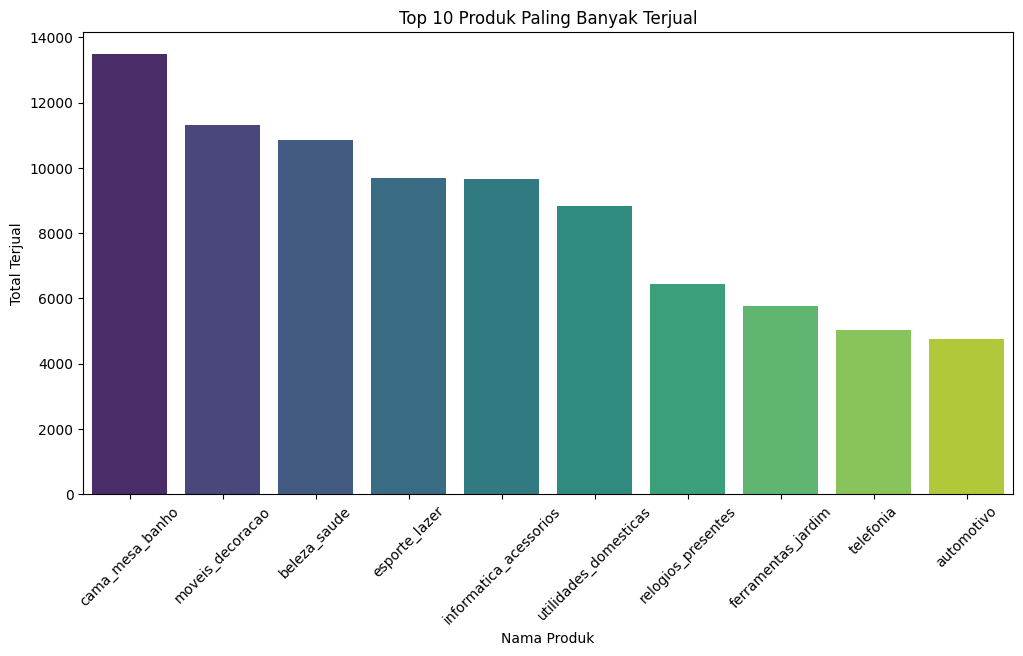

Produk terlaris di setiap bulan:
                             Product  Total Sold
order_month                                    
1                   cama_mesa_banho        1134
2            informatica_acessorios        1523
3                   cama_mesa_banho        1298
4                   cama_mesa_banho        1269
5                   cama_mesa_banho        1349
6                   cama_mesa_banho        1368
7                   cama_mesa_banho        1440
8                   cama_mesa_banho        1399
9                   cama_mesa_banho         634
10                  cama_mesa_banho         769
11                 moveis_decoracao        1249
12                  cama_mesa_banho         643


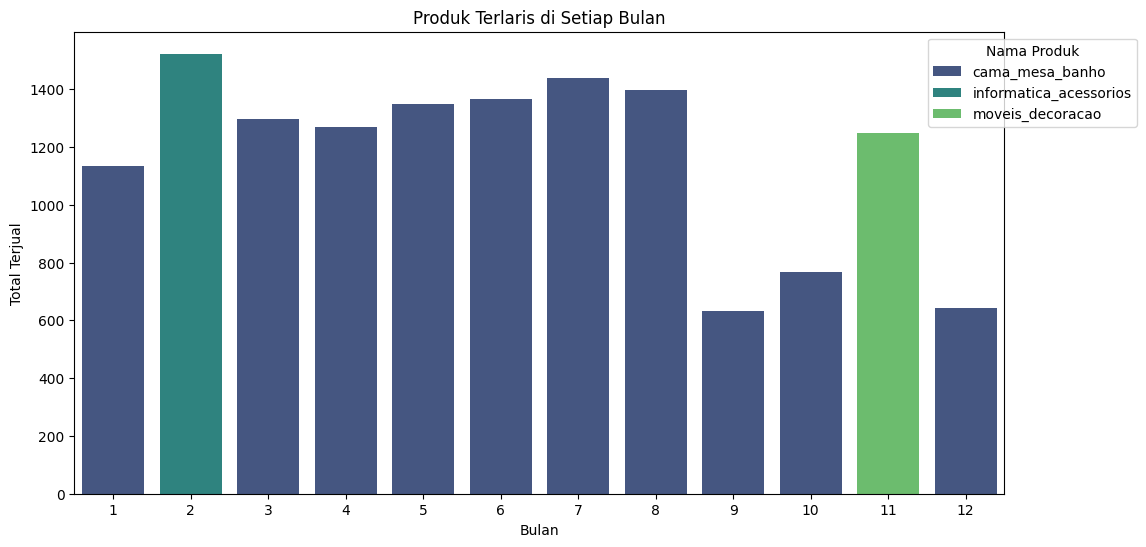

In [112]:
import seaborn as sns

# Menggabungkan dataset items dengan dataset products berdasarkan product_id
items_product = data['items'].merge(data['products'], on='product_id', how='inner')

# Menggabungkan dataset orders dengan items_product berdasarkan order_id
orders_ip = data['orders'].merge(items_product, on='order_id', how='inner')

# Menambahkan kolom bulan dari tanggal pemesanan
orders_ip['order_month'] = orders_ip['order_purchase_timestamp'].dt.month

# Membuat pivot table yang mengagregasi berdasarkan jumlah item yang dibeli
product_sales = orders_ip.pivot_table(index=['product_category_name'], aggfunc={'order_item_id': 'sum'})

# Mengganti nama kolom order_item_id menjadi total_sold
product_sales.rename(columns={'order_item_id': 'total_sold'}, inplace=True)

# Mengurutkan produk berdasarkan total_sold secara menurun
sorted_product_sales = product_sales.sort_values(by='total_sold', ascending=False)

# Menampilkan produk yang paling banyak terjual
most_sold_product = sorted_product_sales.head(10)  # Menampilkan 10 produk teratas
print("Produk yang paling banyak terjual:\n", most_sold_product)

# Visualisasi produk terlaris
plt.figure(figsize=(12, 6))
sns.barplot(x=most_sold_product.index, y=most_sold_product['total_sold'], palette='viridis')
plt.title('Top 10 Produk Paling Banyak Terjual')
plt.xlabel('Nama Produk')
plt.ylabel('Total Terjual')
plt.xticks(rotation=45)
plt.show()

# Membuat pivot table untuk melihat penjualan produk berdasarkan bulan dan nama produk
monthly_sales = orders_ip.pivot_table(index=['product_category_name'], columns=['order_month'], 
                                      values='order_item_id', aggfunc='sum', fill_value=0)

# Menentukan produk terlaris untuk setiap bulan
most_sold_each_month = monthly_sales.idxmax()  # Mengambil produk dengan penjualan terbanyak di setiap bulan
most_sold_values = monthly_sales.max()  # Mengambil jumlah terjual produk terlaris di setiap bulan

# Membuat DataFrame untuk produk terlaris di setiap bulan
most_sold_summary = pd.DataFrame({
    'Product': most_sold_each_month,
    'Total Sold': most_sold_values
})

# Menampilkan DataFrame produk terlaris setiap bulan
print("Produk terlaris di setiap bulan:\n", most_sold_summary)

# Visualisasi produk terlaris setiap bulan
plt.figure(figsize=(12, 6))
sns.barplot(x=most_sold_summary.index, y=most_sold_summary['Total Sold'], hue=most_sold_summary['Product'], dodge=False, palette='viridis')
plt.title('Produk Terlaris di Setiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Terjual')
plt.xticks(rotation=0)  # Tetap menjaga rotasi label bulan
plt.legend(title='Nama Produk', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


**Insight:**
- Cama_mesa_banho adalah produk terlaris
- Produk terlaris tersebut (Cama_mesa_banho) mayoritas juga menjadi produk paling banyak terjual setiap bulannya kecuali pada bulan 2 dan 11

### Pertanyaan 2: Berapa pendapatan e-commerce setiap bulan? Apa produk yang menyumbang pendapatan yang lebih tinggi dibandingkan yang lain tiap bulannya?

Total pendapatan e-commerce per bulan:
              total_revenue
order_month               
1               1178555.01
2               1208520.94
3               1472304.12
4               1473555.21
5               1660024.07
6               1424975.57
7               1518246.84
8               1566666.67
9                737059.28
10               794708.39
11              1149818.35
12               796253.68


C:\Users\icha\AppData\Local\Temp\ipykernel_11096\1097150354.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_revenue.index, y=monthly_revenue['total_revenue'], palette='Blues_d')


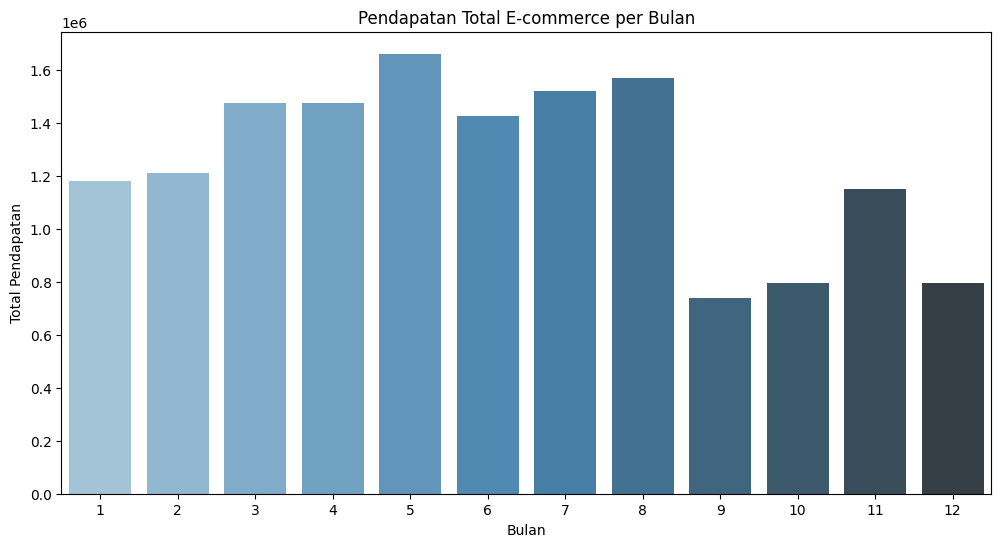

In [113]:
# Menambahkan kolom bulan dari tanggal pemesanan
orders_ip['order_month'] = orders_ip['order_purchase_timestamp'].dt.month

# Menghitung pendapatan untuk setiap item (price * quantity sold)
orders_ip['total_revenue'] = orders_ip['price'] * orders_ip['order_item_id']

# Menghitung total pendapatan untuk setiap bulan
monthly_revenue = orders_ip.pivot_table(index='order_month', values='total_revenue', aggfunc='sum')

# Menampilkan total pendapatan setiap bulan
print("Total pendapatan e-commerce per bulan:\n", monthly_revenue)

# Visualisasi total pendapatan bulanan
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue['total_revenue'], palette='Blues_d')
plt.title('Pendapatan Total E-commerce per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Pendapatan')
plt.xticks(rotation=0)
plt.show()


Menghitung produk dengan keuntungan tertinggi tiap bulan

price                       0
order_purchase_timestamp    0
dtype: int64
Produk dengan pendapatan tertinggi di setiap bulan:
     order_month                 Product  Total Revenue (Rp)
0             1           esporte_lazer            95384.97
1             2  informatica_acessorios           111451.08
2             3      relogios_presentes           120553.56
3             4            beleza_saude           113214.79
4             5      relogios_presentes           155984.46
5             6            beleza_saude           138422.53
6             7            beleza_saude           137763.67
7             8            beleza_saude           168421.24
8             9         cama_mesa_banho            52105.61
9            10      relogios_presentes            67585.70
10           11      relogios_presentes            95292.34
11           12      relogios_presentes            69556.92


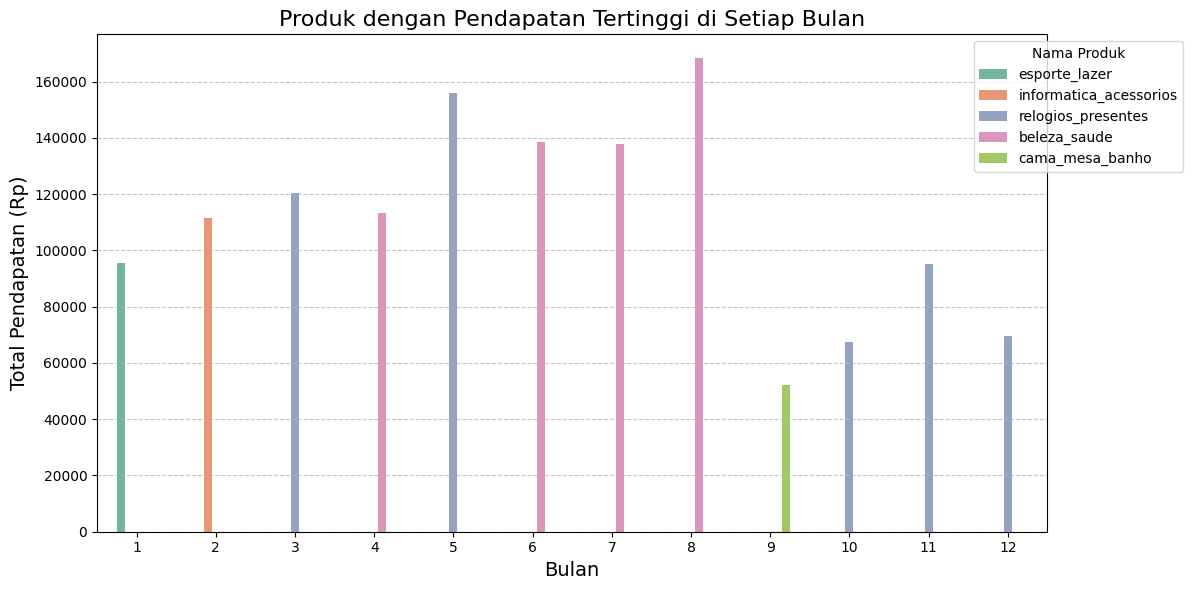

In [114]:
# Pastikan kolom 'price' bertipe numerik dan 'order_purchase_timestamp' bertipe datetime
orders_ip['price'] = pd.to_numeric(orders_ip['price'], errors='coerce')
orders_ip['order_purchase_timestamp'] = pd.to_datetime(orders_ip['order_purchase_timestamp'], errors='coerce')

# Cek apakah ada nilai yang hilang (NaN)
print(orders_ip[['price', 'order_purchase_timestamp']].isnull().sum())

# Menambahkan kolom bulan dari tanggal pemesanan
orders_ip['order_month'] = orders_ip['order_purchase_timestamp'].dt.month

# Menghitung total pendapatan untuk setiap produk
orders_ip['total_revenue'] = orders_ip['price']  # Dianggap sebagai pendapatan total per item

# Menghitung rata-rata total pendapatan untuk setiap produk berdasarkan bulan
monthly_product_revenue = orders_ip.pivot_table(index='product_category_name', 
                                                columns='order_month', 
                                                values='total_revenue', 
                                                aggfunc='sum', 
                                                fill_value=0)

# Menentukan produk dengan pendapatan tertinggi di setiap bulan
most_profitable_product_each_month = monthly_product_revenue.idxmax()  # Produk dengan pendapatan tertinggi di setiap bulan
highest_revenue_each_month = monthly_product_revenue.max()  # Pendapatan tertinggi di setiap bulan

# Membuat DataFrame untuk produk dengan pendapatan tertinggi di setiap bulan
most_profitable_summary = pd.DataFrame({
    'Product': most_profitable_product_each_month,
    'Total Revenue (Rp)': highest_revenue_each_month
}).reset_index()

# Menampilkan DataFrame produk dengan pendapatan tertinggi di setiap bulan
print("Produk dengan pendapatan tertinggi di setiap bulan:\n", most_profitable_summary)

# Visualisasi produk dengan pendapatan tertinggi tiap bulan (warna tiap produk berbeda)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_profitable_summary.index, 
            y=most_profitable_summary['Total Revenue (Rp)'], 
            hue=most_profitable_summary['Product'],  # Menggunakan hue untuk membedakan warna per produk
            palette='Set2',  # Menggunakan palet dengan warna yang lebih variatif
            dodge=True, 
            width=0.5)  # Lebar batang

# Menambahkan label dan judul
plt.title('Produk dengan Pendapatan Tertinggi di Setiap Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Total Pendapatan (Rp)', fontsize=14)

# Mengatur ticks sumbu X agar label dimulai dari 1 hingga 12
plt.xticks(ticks=range(len(most_profitable_summary)), labels=range(1, len(most_profitable_summary)+1), rotation=0)

# Menambahkan legenda dan grid
plt.legend(title='Nama Produk', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Mengatur layout agar tidak terpotong
plt.show()

**Insight:**
- Pendapatan e-commerce terbanyak terdapat pada bulan 5 dengan produk relogios_presentes sebagai produk yang menyumbang pendapatan terbesar pada bulan itu
- Pendapatan e-commerce dalam 1 tahun juga banyak disumbang dari produk tersebut(relogios_presentes) yang menyumbang sebagai pendapatan terbesar pada bulan ke-3,5,10,11,dan 12 lalu disusul oleh produk beleza saude yang menyumbang pendapatan terbesar selama bulan ke 4,6,7,dan 8

### Pertanyaan 3: Daerah manakah yang memiliki pelanggan paling banyak?

In [115]:
# Mengelompokkan data geolocation berdasarkan kode pos dan menghitung jumlah state unik untuk setiap kode pos
geolocation_unique_states = data['geo'].groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='unique_state_count')

# Menghitung jumlah kode pos yang terkait dengan lebih dari satu state
multi_state_zip_codes_count = geolocation_unique_states[geolocation_unique_states['unique_state_count'] >= 2].shape

# Mengelompokkan data berdasarkan kode pos dan state, lalu mendapatkan kode pos yang memiliki state terbanyak
most_common_state = data['geo'].groupby(['geolocation_zip_code_prefix', 'geolocation_state']).size().reset_index(name='state_count').drop_duplicates(subset='geolocation_zip_code_prefix').drop('state_count', axis=1)

# Menghitung nilai median latitude dan longitude untuk setiap kombinasi kode pos, kota, dan state
geolocation_median_values = data['geo'].groupby(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])[['geolocation_lat', 'geolocation_lng']].median().reset_index()

# Menggabungkan data geolocation dengan informasi state terbanyak berdasarkan kode pos
geolocation_final = geolocation_median_values.merge(most_common_state, on=['geolocation_zip_code_prefix', 'geolocation_state'], how='inner')

# Menggabungkan data pelanggan dengan informasi geolocation yang telah diproses berdasarkan kode pos
customers_with_geolocation = customers_df.merge(geolocation_final, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

# Menampilkan 5 baris pertama dari DataFrame pelanggan yang sudah digabungkan
customers_with_geolocation.head(5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,2017-05-26,2017-05-30 22:34:40,14409,franca,SP,-20.502307,-47.396740
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,2018-01-30,2018-02-10 22:43:29,9790,sao bernardo do campo,SP,-23.731211,-46.541206
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,2018-01-30,2018-02-10 22:43:29,9790,são bernardo do campo,SP,-23.727018,-46.543192
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,5ad6695d76ee186dc473c42706984d87,5.0,NaN,2018-06-15,2018-06-15 12:10:59,1151,sao paulo,SP,-23.531294,-46.657039
4,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,5ad6695d76ee186dc473c42706984d87,5.0,NaN,2018-06-15,2018-06-15 12:10:59,1151,são paulo,SP,-23.531294,-46.656866


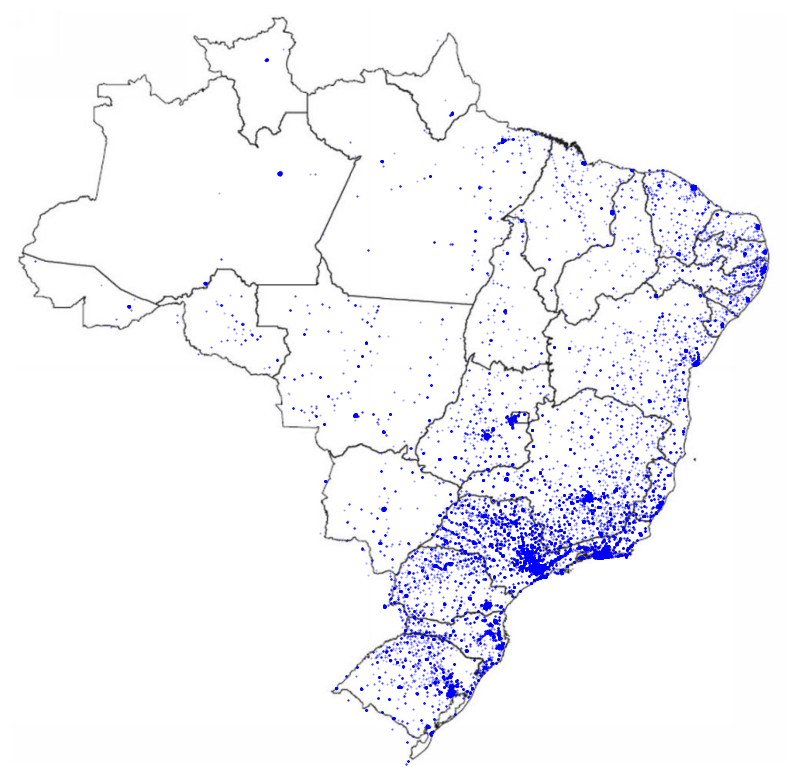

In [116]:
# Menghapus duplikat dari DataFrame customers_silver berdasarkan 'order_id'
customers_with_geolocation = customers_with_geolocation.drop_duplicates('order_id')

# Menyimpan DataFrame yang telah diproses ke dalam file CSV
customers_with_geolocation.to_csv("c:/Users/icha/Documents/dicoding-submission/data/" + 'customers_geo.csv', index=False)

# Fungsi untuk memplot peta Brasil berdasarkan data geolocation
def plot_brazil_map(data):
    # Mengunduh gambar peta Brasil
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'), 'jpg')
    
    # Membuat scatter plot dari longitude dan latitude dengan warna biru
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3, s=0.3, c='blue')  # Mengubah warna menjadi biru
    
    # Menyembunyikan sumbu plot
    plt.axis('off')
    
    # Menampilkan peta Brasil sebagai latar belakang
    plt.imshow(brazil, extent=[-73.98283055, -33.8, -33.75116944, 5.4])
    
    # Menampilkan plot
    plt.show()

# Memanggil fungsi plot_brazil_map dengan DataFrame customers_with_geolocation
plot_brazil_map(customers_with_geolocation.drop_duplicates(subset='customer_unique_id'))


Berdasarkan data map diatas, bisa kita lihat pelanggan banyak tersebar di area bawah Negara Brazil tepatnya bagian Tenggara dan Selatan

Membuktikan dengan jumlah real pelanggan 

In [117]:
# Menghitung jumlah pelanggan untuk setiap kota dan negara bagian
customer_count_by_city_state = customers_with_geolocation.groupby(['geolocation_city', 'geolocation_state'])['customer_unique_id'].nunique().reset_index(name='customer_count')

# Mengurutkan berdasarkan jumlah pelanggan dari yang terbanyak
customer_count_by_city_state = customer_count_by_city_state.sort_values(by='customer_count', ascending=False)

# Menampilkan kota dan negara bagian dengan jumlah pelanggan terbanyak
print("Kota dan Negara Bagian dengan Jumlah Pelanggan Terbanyak:")
print(customer_count_by_city_state)

# Jika ingin menampilkan hanya 10 kota teratas
top_cities_states = customer_count_by_city_state.head(10)
print("\n10 Kota dan Negara Bagian Teratas dengan Jumlah Pelanggan:")
print(top_cities_states)


Kota dan Negara Bagian dengan Jumlah Pelanggan Terbanyak:
     geolocation_city geolocation_state  customer_count
3656        sao paulo                SP           14459
3195   rio de janeiro                RJ            6340
464    belo horizonte                MG            2616
579          brasilia                DF            1844
1169         curitiba                PR            1432
...               ...               ...             ...
1855         itapiuna                CE               1
488         biritinga                BA               1
4152         virginia                MG               1
4167         vitorino                PR               1
4180           xambre                PR               1

[4192 rows x 3 columns]

10 Kota dan Negara Bagian Teratas dengan Jumlah Pelanggan:
           geolocation_city geolocation_state  customer_count
3656              sao paulo                SP           14459
3195         rio de janeiro                RJ            6340

Terkbukti bahawa pelanggan terbanyak berada di kota kota yang berada pada bagian Selatan dan Tenggara seperti Sao Paulo, Rio de Janeiro dan Belo Horizonte

## Conclusion

- Pertanyaan 1: Apa produk yang paling banyak terjual? Apakah ada produk tertentu yang lebih populer di musim atau periode tertentu?
>Produk yang paling banyak terjual adalah Cama_mesa_banho. Produk ini juga menjadi pilihan utama pelanggan hampir setiap bulan. Namun, terdapat dua bulan tertentu—bulan Februari dan November—di mana penjualannya tidak berada di puncaknya (tergantikan dengan produk lain yang lebih laris). Hal ini menunjukkan bahwa meskipun Cama_mesa_banho secara umum menjadi produk yang paling populer, ada faktor musiman atau promosi tertentu yang mempengaruhi perilaku pembelian di bulan-bulan tersebut.
- Pertanyaan 2: Berapa pendapatan e-commerce setiap bulan? Apa produk yang menyumbang pendapatan yang lebih tinggi dibandingkan yang lain tiap bulannya?
> Pendapatan e-commerce mencapai puncaknya pada bulan Mei, di mana produk relogios_presentes menyumbang pendapatan terbesar. Selama satu tahun, produk ini juga menjadi penyumbang utama pada bulan ketiga, kelima, kesepuluh, kesebelas, dan kedua belas.
- Pertanyaan 3: Daerah manakah yang memiliki pelanggan paling banyak?
> Daerah dengan jumlah pelanggan terbanyak terletak di bagian Tenggara dan Selatan Brazil. Berdasarkan data yang tersedia, kota-kota seperti São Paulo, Rio de Janeiro, dan Belo Horizonte menjadi pusat dengan pelanggan psling banyak. Penyebaran pelanggan yang signifikan di area ini dapat dimanfaatkan untuk strategi pemasaran yang lebih efektif.